In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# data set source: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset
movies_df = pd.read_csv('./data/IMDb_movies.csv'
                        , low_memory = False
                       )
movies_df.sample(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
17366,tt0074258,Ballata macabra,Burnt Offerings,1976,1976-10-18,"Horror, Mystery, Thriller",116,"USA, Italy",English,Dan Curtis,...,"Karen Black, Oliver Reed, Burgess Meredith, Ei...",A family moves into a large old mansion that s...,6.5,9463,NaN,NaN,NaN,48.0,143.0,82.0
751,tt0020014,The Idle Rich,The Idle Rich,1929,1929-06-15,Comedy,80,USA,English,William C. de Mille,...,"Conrad Nagel, Bessie Love, Leila Hyams, Robert...",Millionaire William van Luyn falls in love wit...,5.9,118,NaN,NaN,NaN,NaN,6.0,2.0
82618,tt7471884,Silencio,Silencio,2018,2018-11-01,"Drama, Mystery, Thriller",98,Mexico,"Spanish, English",Lorena Villarreal,...,"Novak Ricardo Cañamar, Anna Cetti, Michel Chau...","In order to save her son's life, Ana embarks o...",4.9,239,NaN,$ 158723,$ 338596,29.0,9.0,19.0
54352,tt1130967,The Graduates,The Graduates,2008,2009-07-02,Comedy,97,USA,English,Ryan Gielen,...,"Rob Bradford, Blake Merriman, Nick Vergara, Mi...",Four friends head to Senior Week in Ocean City...,4.5,406,$ 150000,NaN,NaN,NaN,9.0,24.0
13006,tt0061576,Dio perdona... Io no!,Dio perdona... Io no!,1967,1967-10-31,Western,109,"Italy, Spain",Italian,Giuseppe Colizzi,...,"Terence Hill, Frank Wolff, Bud Spencer, Gina R...","After a train is robbed of its payroll, an ins...",6.4,3931,NaN,NaN,NaN,NaN,17.0,9.0


In [3]:
movies_df.shape

(85855, 22)

In [4]:
for x in movies_df.columns:
    print(x)

imdb_title_id
title
original_title
year
date_published
genre
duration
country
language
director
writer
production_company
actors
description
avg_vote
votes
budget
usa_gross_income
worlwide_gross_income
metascore
reviews_from_users
reviews_from_critics


In [5]:
movies_df.actors.iloc[0]

'Blanche Bayliss, William Courtenay, Chauncey Depew'

In [6]:
movies_df.metascore.iloc[0]

nan

In [7]:
movies_df.reviews_from_users.iloc[0]

1.0

In [8]:
movies_df.reviews_from_critics.iloc[0]

2.0

In [9]:
movies_df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [10]:
movies_df.avg_vote.max(), movies_df.avg_vote.min()

(9.9, 1.0)

In [11]:
movies_df.avg_vote.iloc[0]

5.9

In [12]:
movies_df.avg_vote.max(), movies_df.avg_vote.min()

(9.9, 1.0)

In [13]:
movies_df.votes.iloc[0]

154

In [14]:
actor_movie_df = movies_df[['actors', 'title', 'avg_vote']].copy()

In [15]:
actor_movie_df.head()

,actors,title,avg_vote
0,"Blanche Bayliss, William Courtenay, Chauncey D...",Miss Jerry,5.9
1,"Elizabeth Tait, John Tait, Norman Campbell, Be...",The Story of the Kelly Gang,6.1
2,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Den sorte drøm,5.8
3,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",Cleopatra,5.2
4,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",L'Inferno,7.0


In [16]:
actor_movie_df = actor_movie_df.assign(actors=actor_movie_df.actors.str.split(', ')).explode('actors').reset_index()
actor_movie_df.drop('index', axis=1, inplace=True)
actor_movie_df.head(10)

,actors,title,avg_vote
0,Blanche Bayliss,Miss Jerry,5.9
1,William Courtenay,Miss Jerry,5.9
2,Chauncey Depew,Miss Jerry,5.9
3,Elizabeth Tait,The Story of the Kelly Gang,6.1
4,John Tait,The Story of the Kelly Gang,6.1
5,Norman Campbell,The Story of the Kelly Gang,6.1
6,Bella Cola,The Story of the Kelly Gang,6.1
7,Will Coyne,The Story of the Kelly Gang,6.1
8,Sam Crewes,The Story of the Kelly Gang,6.1
9,Jack Ennis,The Story of the Kelly Gang,6.1


In [17]:
# Data set too large for pivot table, use neural networks
actor_movie_df.shape

(1155362, 3)

In [18]:
# encoding...
actor_ids = actor_movie_df['actors'].unique().tolist()
actor2actor_encoded = {x: i for i, x in enumerate(actor_ids)}
actor_encoded2actor = {i: x for i, x in enumerate(actor_ids)}

movie_ids = actor_movie_df['title'].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

actor_movie_df['actors'] = actor_movie_df['actors'].map(actor2actor_encoded)
actor_movie_df['title'] = actor_movie_df['title'].map(movie2movie_encoded)

num_actors = len(actor2actor_encoded)
num_movies = len(movie2movie_encoded)

actor_movie_df['avg_vote'] = actor_movie_df['avg_vote'].values.astype(np.float32)

min_vote = min(actor_movie_df['avg_vote'])
max_vote = max(actor_movie_df['avg_vote'])

print(f'Actors: {num_actors}\nMovies: {num_movies}\nMin Vote: {min_vote}\nMax Vote: {round(max_vote, 1)}')

Actors: 417321
Movies: 82094
Min Vote: 1.0
Max Vote: 9.9


In [19]:
# prepare training and valdiation data
from random import shuffle
idx_lst = [x for x in range(0, actor_movie_df.shape[0])]
shuffle(idx_lst)
actor_movie_df = actor_movie_df.iloc[idx_lst]

In [20]:
actor_movie_df.head()

,actors,title,avg_vote
551832,187092,39581,6.0
86204,12376,6978,5.9
433363,144329,31243,6.7
324632,56523,23906,5.1
350077,63762,25615,5.2


In [21]:
x = actor_movie_df[['actors', 'title']].values
y = actor_movie_df['avg_vote'].apply(lambda x: (x - min_vote)/(max_vote - min_vote))

In [22]:
train_indices = int(0.9 * actor_movie_df.shape[0])
X_train, X_test, y_train, y_test = (x[:train_indices]
                                    , x[train_indices:]
                                    , y[:train_indices]
                                    , y[train_indices:]
                                   )

In [23]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_actors, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_actors = num_actors
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        
        self.actor_embedding = layers.Embedding(num_actors
                                               , embedding_size
                                               , embeddings_initializer="he_normal"
                                               , embeddings_regularizer=keras.regularizers.l2(1e-6)
                                              )
        self.actor_bias = layers.Embedding(num_actors, 1)
        
        self.movie_embedding = layers.Embedding(num_movies
                                                , embedding_size
                                                , embeddings_initializer="he_normal"
                                                , embeddings_regularizer=keras.regularizers.l2(1e-6)
                                               )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        actor_vector = self.actor_embedding(inputs[:, 0])
        actor_bias = self.actor_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        
        dot_actor_movie = tf.tensordot(actor_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_actor_movie + actor_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_actors
                       , num_movies
                       , EMBEDDING_SIZE
                      )

model.compile(loss=tf.keras.losses.BinaryCrossentropy()
              , optimizer=keras.optimizers.Adam(lr=0.001)
             )

### GPU

In [25]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10808396415602164395
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10023215058000600851
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13209569550599845270
physical_device_desc: "device: XLA_GPU device"
]


In [27]:
history = model.fit(x=X_train
                    , y=y_train
                    , batch_size=256
                    , epochs=5
                    , verbose=1
                    , validation_data=(X_test, y_test)
                   )

Epoch 1/5
2031/2031 [==============================] - 247s 122ms/step - loss: 2.7971 - val_loss: 1.3520
Epoch 2/5
2031/2031 [==============================] - 248s 122ms/step - loss: 1.8222 - val_loss: 0.8406
Epoch 3/5
2031/2031 [==============================] - 248s 122ms/step - loss: 1.3330 - val_loss: 1.0524
Epoch 4/5
2031/2031 [==============================] - 249s 123ms/step - loss: 1.8767 - val_loss: 1.6485
Epoch 5/5
2031/2031 [==============================] - 250s 123ms/step - loss: 3.1941 - val_loss: 2.7224


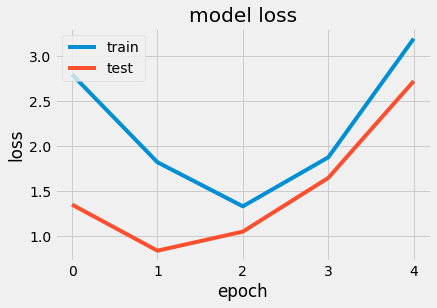

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [29]:
names_df = pd.read_csv('./data/IMDb_names.csv'
                       , low_memory = False
                      )
names_df.sample(5)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
118156,nm0803162,William Sistrom,William Sistrom,NaN,NaN,"March 19, 1884 in Lincolnshire, England, UK",1884-03-19,"Lincolnshire, England, UK","March 13, 1972 in Phoenix, Arizona, USA",1972-03-13,"Phoenix, Arizona, USA",NaN,NaN,0,0,0,0
251504,nm5310225,Sophie Skelton,Sophie Skelton,170.0,Sophie Alexandra Skelton was born and raised i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
268000,nm7013850,Sahar El Sayegh,Sahar El Sayegh,NaN,"Sahar El Sayegh was born on January 1, 1990 in...","January 1, 1990 in Cairo, Egypt",1990-01-01,"Cairo, Egypt",NaN,NaN,NaN,NaN,NaN,0,0,0,0
14360,nm0067126,Katerina Bei,Katerina Bei,NaN,"Katerina Bei is a writer and actress, known fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
221812,nm2989840,Shawn Thomas Diefenbach,Shawn Thomas Diefenbach,185.0,"Born in Massachusetts, Shawn grew up between t...","January 25, 1985 in Springfield, Massachusetts...",1985-01-25,"Springfield, Massachusetts, USA",NaN,NaN,NaN,NaN,NaN,0,0,0,0
